### Importaci√≥n de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

Producto Categor√≠a del Producto    Precio  Costo de env√≠o  \
0  Asistente virtual           Electr√≥nicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodom√©sticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificaci√≥n  \
0      16/01/2021      Pedro Gomez          Bogot√°             4   
1      18/05/2022  Beatriz Morales        Medell√≠n             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medell√≠n             5   

       M√©todo de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de cr√©dito                   8   4.60971 -74.08175  
1  Tarjeta de cr√©dito                   4   6.25184 -75.56359  
2  Tarjeta de cr√©dito                   1  10.39972 -75.51444  
3               Nequi                   1   3.43722 -76.52250  
4               Nequi                   1   6.25184 -75.56359

**Ajustando datos**

In [3]:
import pandas as pd

# Carga de datos
tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# A√±adir columna identificadora
tienda["Tienda"] = "Tienda 1"
tienda2["Tienda"] = "Tienda 2"
tienda3["Tienda"] = "Tienda 3"
tienda4["Tienda"] = "Tienda 4"

# Unir en un solo DataFrame
df = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)


In [4]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")


In [5]:
print(df.columns.tolist())


['producto', 'categor√≠a_del_producto', 'precio', 'costo_de_env√≠o', 'fecha_de_compra', 'vendedor', 'lugar_de_compra', 'calificaci√≥n', 'm√©todo_de_pago', 'cantidad_de_cuotas', 'lat', 'lon', 'tienda']


#1. An√°lisis de facturaci√≥n



In [7]:
#Como cada fila representa una venta de un producto, la facturaci√≥n por fila es simplemente el valor en la columna 'precio'. Si no tienes columna 'facturacion' a√∫n:
df['facturacion'] = df['precio'].round(0).astype(int)  # Redondear y convertir a entero
df['facturacion']


0       164300
1       192300
2       209600
3       757500
4       335200
         ...  
9430    227700
9431    342000
9432     36700
9433    151800
9434     11200
Name: facturacion, Length: 9435, dtype: int64

In [8]:
facturacion_por_tienda = df.groupby("tienda")["facturacion"].sum().astype(int).sort_values(ascending=False)
facturacion_por_tienda
#Ahora sumamos la facturaci√≥n total por tienda, como enteros:

tienda
Tienda 1    1150880400
Tienda 2    1116343500
Tienda 3    1098019600
Tienda 4    1038375700
Name: facturacion, dtype: int64

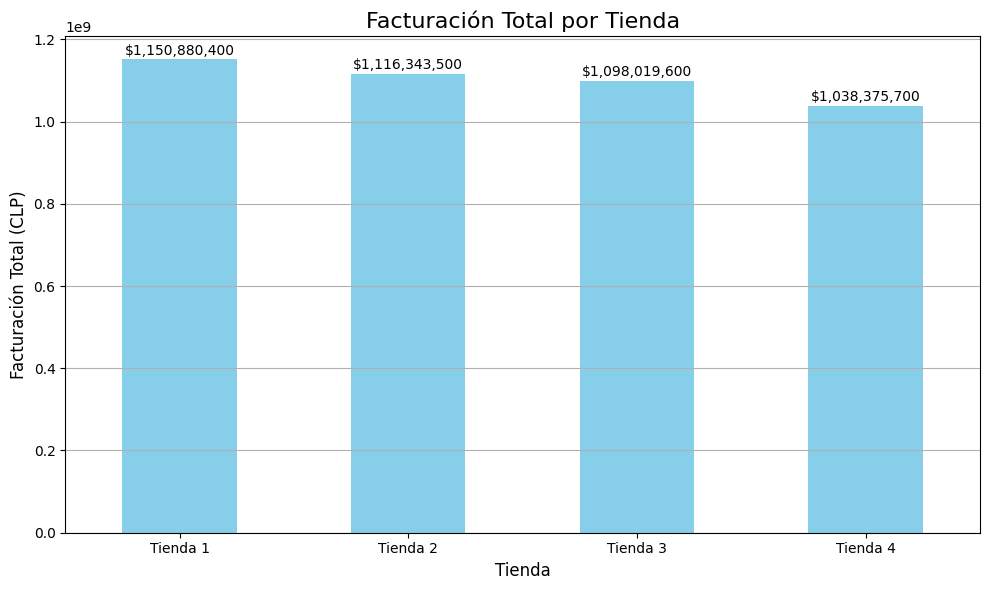

In [ ]:
#Graficar sin decimales
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
facturacion_por_tienda.plot(kind="bar", color="skyblue")
plt.title("Facturaci√≥n Total por Tienda", fontsize=16)
plt.xlabel("Tienda", fontsize=12)
plt.ylabel("Facturaci√≥n Total (CLP)", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y')

# A√±adir etiquetas de valor entero encima de cada barra
for i, valor in enumerate(facturacion_por_tienda):
    plt.text(i, valor + max(facturacion_por_tienda)*0.01, f"${valor:,}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


# 2. Ventas por categor√≠a

In [10]:
# Asegur√©monos de que los nombres de las columnas est√°n correctos
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Agrupar por tienda y categor√≠a, y sumar el precio
ventas_categoria_tienda = df.groupby(['tienda', 'categor√≠a_del_producto'])['precio'].sum().reset_index()

# Mostrar los primeros resultados
print(ventas_categoria_tienda)


      tienda   categor√≠a_del_producto       precio
0   Tienda 1  Art√≠culos para el hogar   12698400.0
1   Tienda 1     Deportes y diversi√≥n   39290000.0
2   Tienda 1        Electrodom√©sticos  363685200.0
3   Tienda 1             Electr√≥nicos  429493500.0
4   Tienda 1   Instrumentos musicales   91299000.0
5   Tienda 1                 Juguetes   17995700.0
6   Tienda 1                   Libros    8784900.0
7   Tienda 1                  Muebles  187633700.0
8   Tienda 2  Art√≠culos para el hogar   14746900.0
9   Tienda 2     Deportes y diversi√≥n   34744500.0
10  Tienda 2        Electrodom√©sticos  348567800.0
11  Tienda 2             Electr√≥nicos  410831100.0
12  Tienda 2   Instrumentos musicales  104990300.0
13  Tienda 2                 Juguetes   15945400.0
14  Tienda 2                   Libros   10091200.0
15  Tienda 2                  Muebles  176426300.0
16  Tienda 3  Art√≠culos para el hogar   15060000.0
17  Tienda 3     Deportes y diversi√≥n   35593100.0
18  Tienda 3        

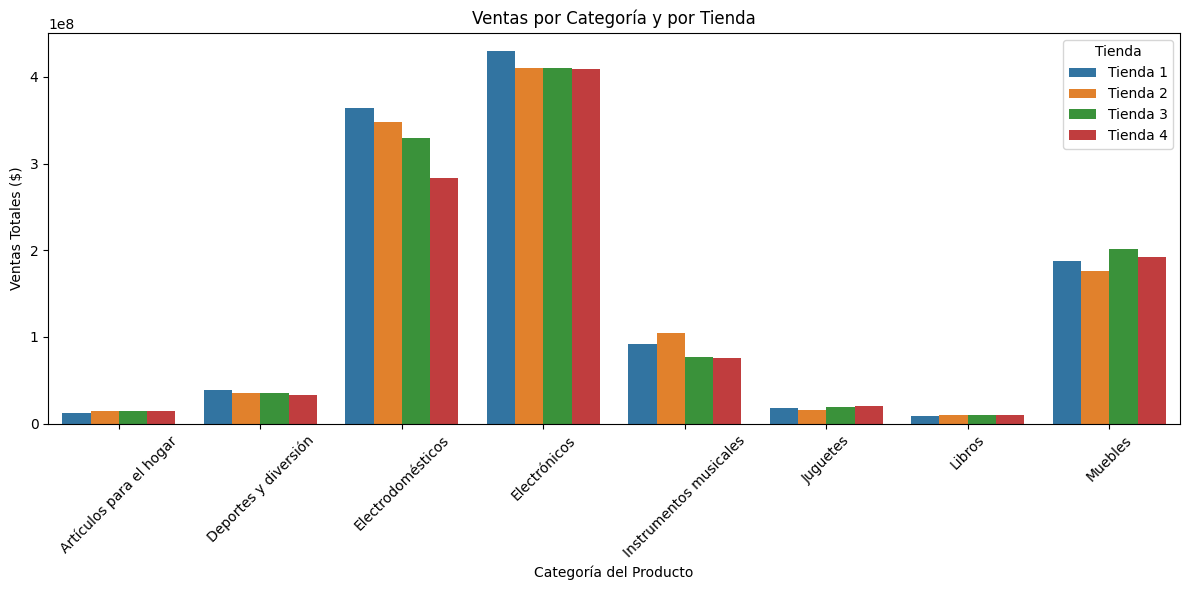

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el gr√°fico de barras agrupadas
plt.figure(figsize=(12, 6))
sns.barplot(data=ventas_categoria_tienda, x='categor√≠a_del_producto', y='precio', hue='tienda')

# Ajustes visuales
plt.title('Ventas por Categor√≠a y por Tienda')
plt.xlabel('Categor√≠a del Producto')
plt.ylabel('Ventas Totales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Tienda')
plt.show()


In [17]:
# Calcular el porcentaje de participaci√≥n por categor√≠a
ventas_totales_por_categoria = ventas_categoria_tienda.groupby('categor√≠a_del_producto')['precio'].transform('sum')
ventas_categoria_tienda['porcentaje_participacion'] = (ventas_categoria_tienda['precio'] / ventas_totales_por_categoria) * 100
ventas_totales_por_categoria
ventas_categoria_tienda

tienda   categor√≠a_del_producto       precio  porcentaje_participacion
0   Tienda 1  Art√≠culos para el hogar   12698400.0                 22.053567
1   Tienda 1     Deportes y diversi√≥n   39290000.0                 27.479810
2   Tienda 1        Electrodom√©sticos  363685200.0                 27.453097
3   Tienda 1             Electr√≥nicos  429493500.0                 25.864120
4   Tienda 1   Instrumentos musicales   91299000.0                 26.177228
5   Tienda 1                 Juguetes   17995700.0                 24.449218
6   Tienda 1                   Libros    8784900.0                 23.304533
7   Tienda 1                  Muebles  187633700.0                 24.764862
8   Tienda 2  Art√≠culos para el hogar   14746900.0                 25.611239
9   Tienda 2     Deportes y diversi√≥n   34744500.0                 24.300643
10  Tienda 2        Electrodom√©sticos  348567800.0                 26.311946
11  Tienda 2             Electr√≥nicos  410831100.0                 24.740269
12  Tienda 2   Instrumentos musicales  104990300.0                 30.102795
13  Tienda 2                 Juguetes   15945400.0                 21.663651
14  Tienda 2                   Libros   10091200.0                 26.769878
15  Tienda 2                  Muebles  176426300.0                 23.285651
16  Tienda 3  Art√≠culos para el hogar   15060000.0                 26.155006
17  Tienda 3     Deportes y diversi√≥n   35593100.0                 24.894162
18  Tienda 3        Electrodom√©sticos  329237900.0                 24.852812
19  Tienda 3             Electr√≥nicos  410775800.0                 24.736939
20  Tienda 3   Instrumentos musicales   77380900.0                 22.186634
21  Tienda 3                 Juguetes   19401100.0                 26.358614
22  Tienda 3                   Libros    9498700.0                 25.198097
23  Tienda 3                  Muebles  201072100.0                 26.538531
24  Tienda 4  Art√≠culos para el hogar   15074500.0                 26.180188
25  Tienda 4     Deportes y diversi√≥n   33350100.0                 23.325386
26  Tienda 4        Electrodom√©sticos  283260200.0                 21.382145
27  Tienda 4             Electr√≥nicos  409476100.0                 24.658671
28  Tienda 4   Instrumentos musicales   75102400.0                 21.533343
29  Tienda 4                 Juguetes   20262200.0                 27.528517
30  Tienda 4                   Libros    9321300.0                 24.727492
31  Tienda 4                  Muebles  192528900.0                 25.410956

# 3. Calificaci√≥n promedio de la tienda


In [18]:
calificacion_promedio = df.groupby('tienda')['calificaci√≥n'].mean().reset_index()
print(calificacion_promedio)


     tienda  calificaci√≥n
0  Tienda 1      3.976685
1  Tienda 2      4.037304
2  Tienda 3      4.048326
3  Tienda 4      3.995759


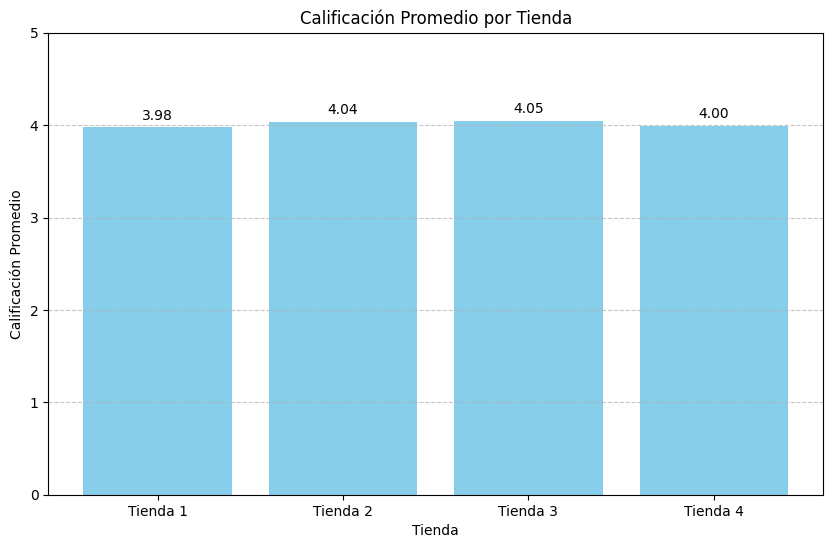

In [21]:
import matplotlib.pyplot as plt

# Crear la figura
plt.figure(figsize=(10,6))
barras = plt.bar(calificacion_promedio['tienda'], calificacion_promedio['calificaci√≥n'], color='skyblue')

# T√≠tulos y etiquetas
plt.title('Calificaci√≥n Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificaci√≥n Promedio')
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar los valores sobre cada barra
for barra in barras:
    altura = barra.get_height()
    plt.text(
        barra.get_x() + barra.get_width() / 2,
        altura + 0.05,  # posici√≥n un poco sobre la barra
        f'{altura:.2f}',  # formato con 2 decimales
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

plt.show()



# 4. Productos m√°s y menos vendidos

In [23]:
# Agrupar por tienda y producto para contar cu√°ntas veces se vendi√≥ cada uno
ventas_por_producto = df.groupby(['tienda', 'producto']).size().reset_index(name='CantidadVendida')

# Obtener el producto m√°s vendido por tienda
mas_vendido_por_tienda = ventas_por_producto.loc[ventas_por_producto.groupby('tienda')['CantidadVendida'].idxmax()]

# Obtener el producto menos vendido por tienda
menos_vendido_por_tienda = ventas_por_producto.loc[ventas_por_producto.groupby('tienda')['CantidadVendida'].idxmin()]

print("‚úÖ Producto m√°s vendido por tienda:")
print(mas_vendido_por_tienda)

print("\nüîª Producto menos vendido por tienda:")
print(menos_vendido_por_tienda)


‚úÖ Producto m√°s vendido por tienda:
       tienda                   producto  CantidadVendida
1    Tienda 1                    Armario               60
75   Tienda 2  Iniciando en programaci√≥n               65
129  Tienda 3              Kit de bancas               57
163  Tienda 4                   Cama box               62

üîª Producto menos vendido por tienda:
       tienda                   producto  CantidadVendida
4    Tienda 1  Auriculares con micr√≥fono               33
77   Tienda 2              Juego de mesa               32
111  Tienda 3    Bloques de construcci√≥n               35
175  Tienda 4         Guitarra el√©ctrica               33


In [24]:
# Unir con el DataFrame original para obtener el precio
mas_vendido_con_precio = pd.merge(mas_vendido_por_tienda, df[['tienda', 'producto', 'precio']], on=['tienda', 'producto'], how='left').drop_duplicates(subset=['tienda', 'producto'])
menos_vendido_con_precio = pd.merge(menos_vendido_por_tienda, df[['tienda', 'producto', 'precio']], on=['tienda', 'producto'], how='left').drop_duplicates(subset=['tienda', 'producto'])

print("‚úÖ Precio del producto m√°s vendido por tienda:")
print(mas_vendido_con_precio)

print("\nüîª Precio del producto menos vendido por tienda:")
print(menos_vendido_con_precio)

‚úÖ Precio del producto m√°s vendido por tienda:
       tienda                   producto  CantidadVendida    precio
0    Tienda 1                    Armario               60  513400.0
60   Tienda 2  Iniciando en programaci√≥n               65   58600.0
125  Tienda 3              Kit de bancas               57  336000.0
182  Tienda 4                   Cama box               62  473800.0

üîª Precio del producto menos vendido por tienda:
       tienda                   producto  CantidadVendida    precio
0    Tienda 1  Auriculares con micr√≥fono               33  143600.0
33   Tienda 2              Juego de mesa               32  153000.0
65   Tienda 3    Bloques de construcci√≥n               35   34700.0
100  Tienda 4         Guitarra el√©ctrica               33  626200.0


In [27]:
import pandas as pd

# Agrupar por tienda y producto para contar cu√°ntas veces se vendi√≥ cada uno
ventas_por_producto = df.groupby(['tienda', 'producto']).size().reset_index(name='CantidadVendida')

# Producto m√°s vendido por tienda
mas_vendido = ventas_por_producto.loc[ventas_por_producto.groupby('tienda')['CantidadVendida'].idxmax()]
mas_vendido = mas_vendido.rename(columns={'producto': 'Producto_M√°s_Vendido'})

# Producto menos vendido por tienda
menos_vendido = ventas_por_producto.loc[ventas_por_producto.groupby('tienda')['CantidadVendida'].idxmin()]
menos_vendido = menos_vendido.rename(columns={'producto': 'Producto_Menos_Vendido'})

# Env√≠o promedio por tienda
envio_promedio = df.groupby('tienda')['costo_de_env√≠o'].mean().reset_index()
envio_promedio['costo_de_env√≠o'] = envio_promedio['costo_de_env√≠o'].round(2)

# Unir todo en una tabla resumen
tabla_resumen = mas_vendido[['tienda', 'Producto_M√°s_Vendido']].merge(
    menos_vendido[['tienda', 'Producto_Menos_Vendido']], on='tienda'
).merge(envio_promedio, on='tienda')

# Mostrar resultado
print("\nüìä Tabla resumen por tienda:")
print(tabla_resumen)



üìä Tabla resumen por tienda:
     tienda       Producto_M√°s_Vendido     Producto_Menos_Vendido  \
0  Tienda 1                    Armario  Auriculares con micr√≥fono   
1  Tienda 2  Iniciando en programaci√≥n              Juego de mesa   
2  Tienda 3              Kit de bancas    Bloques de construcci√≥n   
3  Tienda 4                   Cama box         Guitarra el√©ctrica   

   costo_de_env√≠o  
0        26018.61  
1        25216.24  
2        24805.68  
3        23459.46  


# 5. Env√≠o promedio por tienda

In [25]:
# Calcular el env√≠o promedio por tienda
envio_promedio = df.groupby('tienda')['costo_de_env√≠o'].mean().reset_index()

# Redondear a dos decimales
envio_promedio['costo_de_env√≠o'] = envio_promedio['costo_de_env√≠o'].round(2)

print("\nüöö Env√≠o promedio por tienda:")
print(envio_promedio)



üöö Env√≠o promedio por tienda:
     tienda  costo_de_env√≠o
0  Tienda 1        26018.61
1  Tienda 2        25216.24
2  Tienda 3        24805.68
3  Tienda 4        23459.46


In [28]:
# Agrupar datos clave por tienda
facturacion = df.groupby('tienda')['facturacion'].sum()
envio_total = df.groupby('tienda')['costo_de_env√≠o'].sum()
ventas_totales = df.groupby('tienda').size()
calificacion_prom = df.groupby('tienda')['calificaci√≥n'].mean()

# Crear DataFrame resumen
rentabilidad = pd.DataFrame({
    'Facturaci√≥n': facturacion,
    'Costo_Envio_Total': envio_total,
    'Productos_Vendidos': ventas_totales,
    'Calificaci√≥n_Promedio': calificacion_prom
})

# Calcular indicadores
rentabilidad['Margen_Estimado'] = rentabilidad['Facturaci√≥n'] - rentabilidad['Costo_Envio_Total']
rentabilidad['Rentabilidad_Relativa'] = rentabilidad['Margen_Estimado'] / rentabilidad['Productos_Vendidos']
rentabilidad['Costo_Envio_por_Producto'] = rentabilidad['Costo_Envio_Total'] / rentabilidad['Productos_Vendidos']

# Mostrar ordenado por menor rentabilidad
rentabilidad_ordenada = rentabilidad.sort_values(by='Rentabilidad_Relativa')
print("üè™ Tiendas ordenadas por menor rentabilidad:\n")
print(rentabilidad_ordenada)


üè™ Tiendas ordenadas por menor rentabilidad:

          Facturaci√≥n  Costo_Envio_Total  Productos_Vendidos  \
tienda                                                         
Tienda 4   1038375700         55317400.0                2358   
Tienda 3   1098019600         58516600.0                2359   
Tienda 2   1116343500         59485100.0                2359   
Tienda 1   1150880400         61377900.0                2359   

          Calificaci√≥n_Promedio  Margen_Estimado  Rentabilidad_Relativa  \
tienda                                                                    
Tienda 4               3.995759     9.830583e+08          416903.435115   
Tienda 3               4.048326     1.039503e+09          440654.090716   
Tienda 2               4.037304     1.056858e+09          448011.191183   
Tienda 1               3.976685     1.089502e+09          461849.300551   

          Costo_Envio_por_Producto  
tienda                              
Tienda 4              23459.457167  
Tie

In [30]:
df['utilidad'] = df['precio'] - df['costo_de_env√≠o']

utilidad_por_tienda = df.groupby('tienda')['utilidad'].sum().astype(int).sort_values(ascending=False)

print(utilidad_por_tienda)


tienda
Tienda 1    1089502500
Tienda 2    1056858400
Tienda 3    1039503000
Tienda 4     983058300
Name: utilidad, dtype: int64


In [31]:
import pandas as pd

# Asegurarnos que los nombres de columnas est√°n limpios y en formato est√°ndar
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Calcular utilidad por fila (venta)
df['utilidad'] = df['precio'] - df['costo_de_env√≠o']

# Agrupar por tienda y calcular m√©tricas clave
resumen_tiendas = df.groupby('tienda').agg(
    facturacion_total = ('precio', 'sum'),
    costo_envio_total = ('costo_de_env√≠o', 'sum'),
    utilidad_total = ('utilidad', 'sum'),
    productos_vendidos = ('producto', 'count'),
    calificacion_promedio = ('calificaci√≥n', 'mean')
).reset_index()

# Convertir n√∫meros relevantes a enteros para mejor an√°lisis (facturaci√≥n, costo, utilidad, productos)
resumen_tiendas['facturacion_total'] = resumen_tiendas['facturacion_total'].astype(int)
resumen_tiendas['costo_envio_total'] = resumen_tiendas['costo_envio_total'].astype(int)
resumen_tiendas['utilidad_total'] = resumen_tiendas['utilidad_total'].astype(int)
resumen_tiendas['productos_vendidos'] = resumen_tiendas['productos_vendidos'].astype(int)

# Ordenar por utilidad total ascendente para ver la menos rentable primero
resumen_ordenado = resumen_tiendas.sort_values(by='utilidad_total')

print("üìâ Tiendas ordenadas de menos a m√°s rentable:\n")
print(resumen_ordenado)


üìâ Tiendas ordenadas de menos a m√°s rentable:

     tienda  facturacion_total  costo_envio_total  utilidad_total  \
3  Tienda 4         1038375700           55317400       983058300   
2  Tienda 3         1098019600           58516600      1039503000   
1  Tienda 2         1116343500           59485100      1056858400   
0  Tienda 1         1150880400           61377900      1089502500   

   productos_vendidos  calificacion_promedio  
3                2358               3.995759  
2                2359               4.048326  
1                2359               4.037304  
0                2359               3.976685  


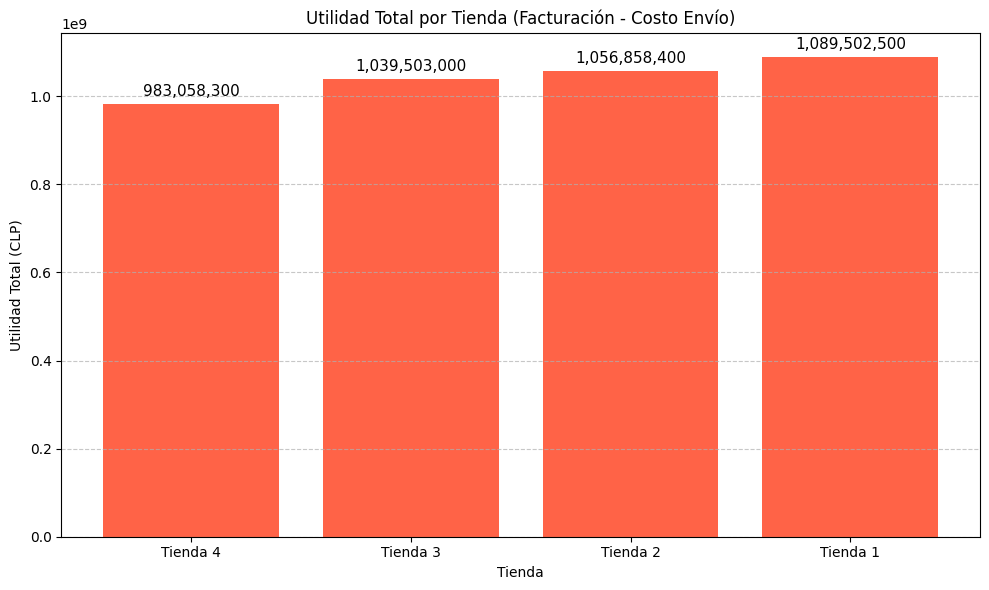

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
barras = plt.bar(resumen_ordenado['tienda'], resumen_ordenado['utilidad_total'], color='tomato')

plt.title('Utilidad Total por Tienda (Facturaci√≥n - Costo Env√≠o)')
plt.xlabel('Tienda')
plt.ylabel('Utilidad Total (CLP)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar los valores encima de las barras
for barra in barras:
    altura = barra.get_height()
    plt.text(
        barra.get_x() + barra.get_width() / 2,
        altura + max(resumen_ordenado['utilidad_total'])*0.01,
        f'{altura:,}',
        ha='center',
        va='bottom',
        fontsize=11,
        color='black'
    )

plt.tight_layout()
plt.show()


# Reporte de Rentabilidad de Tiendas

Estimado Sr. Juan,

Luego de analizar la informaci√≥n de ventas, costos y calificaciones, hemos determinado cu√°l es la tienda menos rentable seg√∫n los datos disponibles.

En este reporte encontrar√° un resumen de la facturaci√≥n, costos, utilidad y otros indicadores clave para cada tienda.

---

A continuaci√≥n, se presenta el an√°lisis detallado.


In [33]:
# Suponiendo que 'resumen_ordenado' es el DataFrame con el an√°lisis que hicimos antes

# Mostrar la tabla resumen
print(resumen_ordenado)

# Extraer la tienda menos rentable (la primera fila despu√©s de ordenar por utilidad)
menos_rentable = resumen_ordenado.iloc[0]

mensaje = f"""
La tienda menos rentable es **{menos_rentable['tienda']}** con una utilidad total de ${menos_rentable['utilidad_total']:,} CLP.

Esta tienda tiene una facturaci√≥n total de ${menos_rentable['facturacion_total']:,} CLP, un costo total de env√≠o de ${menos_rentable['costo_envio_total']:,} CLP,
vendi√≥ {menos_rentable['productos_vendidos']} productos y tiene una calificaci√≥n promedio de {menos_rentable['calificacion_promedio']:.2f}.

Se recomienda analizar estrategias para mejorar la rentabilidad de esta tienda.
"""

from IPython.display import Markdown
display(Markdown(mensaje))


     tienda  facturacion_total  costo_envio_total  utilidad_total  \
3  Tienda 4         1038375700           55317400       983058300   
2  Tienda 3         1098019600           58516600      1039503000   
1  Tienda 2         1116343500           59485100      1056858400   
0  Tienda 1         1150880400           61377900      1089502500   

   productos_vendidos  calificacion_promedio  
3                2358               3.995759  
2                2359               4.048326  
1                2359               4.037304  
0                2359               3.976685  



La tienda menos rentable es **Tienda 4** con una utilidad total de $983,058,300 CLP.

Esta tienda tiene una facturaci√≥n total de $1,038,375,700 CLP, un costo total de env√≠o de $55,317,400 CLP, 
vendi√≥ 2358 productos y tiene una calificaci√≥n promedio de 4.00.

Se recomienda analizar estrategias para mejorar la rentabilidad de esta tienda.
